In [1]:
# 1. importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [2]:
# loading data
df = pd.read_csv('renttherunway.csv')

In [3]:
# 2. Checking samples
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
# familiarizing with data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [5]:
df.shape

(192544, 16)

In [6]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [7]:
df.describe(include='O')

,fit,bust size,weight,rented for,review_text,body type,review_summary,category,height,review_date
count,192544,174133,162562,192534,192482,177907,192199,192544,191867,192544
unique,3,106,190,9,191027,7,154736,68,24,2274
top,fit,34b,130lbs,wedding,.,hourglass,Stylist Review,dress,"5' 4""","June 15, 2016"
freq,142058,27285,14370,57784,63,55349,977,92884,28012,844


In [8]:
# 3. Checking for duplicate records
df[df.duplicated()] # there are no duplicate records

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


In [9]:
# 4. Dropping redundant columns
df.columns 

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [10]:
# columns Unnamed: 0, user_id, item_id, review_text, review_summary, review_date seem redundant hence dropping them
df=df.drop(['Unnamed: 0','user_id', 'item_id', 'review_text', 'review_summary', 'review_date'],axis=1)

In [11]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [12]:
df.shape

(192544, 10)

In [13]:
# 5. Creating function for cleaning of weight data
def clean_weight(x):
    if isinstance(x,str):
        return(x.replace('lbs',''))
    return(x)

In [14]:
#cleaning data for required columns
df['weight'] =df['weight'].apply(clean_weight).astype('float')

In [15]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [16]:
# 6. checking for unique values in rented for
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [17]:
# replacing 'party:cocktail' with party
df['rented for'] = df['rented for'].replace(['party: cocktail'],'party')

In [18]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [19]:
# 7. Converting feet and inches with quote to inches in float
# defingin fucntion for conversion 
def conv_ht(ht):
    if isinstance(ht,str):
        ht_ = ht.split("' ")
        ft_ = float(ht_[0])
        in_ = float(ht_[1].replace("\"",""))
        return (12*ft_) + in_
    return(ht)

In [20]:
# appling function
df['height'] = df['height'].apply(lambda x:conv_ht(x))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      162562 non-null  float64
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  float64
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


In [22]:
# 8. Checking for missing values and imputing if any
df.isnull().sum()

fit               0
bust size     18411
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [23]:
df.fillna(value=0,inplace=True)

In [24]:
df.isnull().sum() # null values have been replaced with 0

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [25]:
# 9. Statistical summary of numerical and categorical columns
df.describe() # numerical comlumns Findings: Mean age=33, weight=115.99, height=65"

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,115.997751,9.088499,65.080984,12.245175,33.702141
std,53.726993,1.441995,4.691938,8.494877,8.384539
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,8.000000,63.000000,8.000000,29.000000
50%,130.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [26]:
df.describe(include='O') # categorical columns

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,107,9,8,68
top,fit,34b,wedding,hourglass,dress
freq,142058,27285,57784,55349,92884


<AxesSubplot:xlabel='age'>

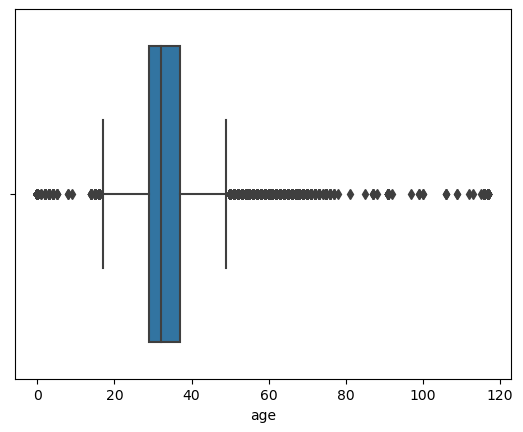

In [27]:
# 10. Checking for outliers in column 'age' and treatment of the same
sns.boxplot(df['age']) # outliers are present

In [29]:
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.5)
q3 = df['age'].quantile(0.75)

In [30]:
IQR = q3-q1

In [31]:
upper_limit = q3+1.5*(IQR)
lower_limit = q1-1.5*(IQR)

In [32]:
data_wo_out = df.loc[(df['age'] > lower_limit) & (df['age'] < upper_limit)]

<AxesSubplot:xlabel='age'>

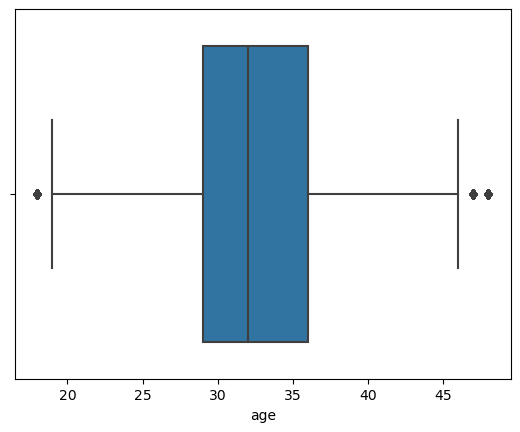

In [33]:
sns.boxplot(data_wo_out['age']) # number of outliers have reduced

In [34]:
data_wo_out.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,68.0,8,45.0


<AxesSubplot:>

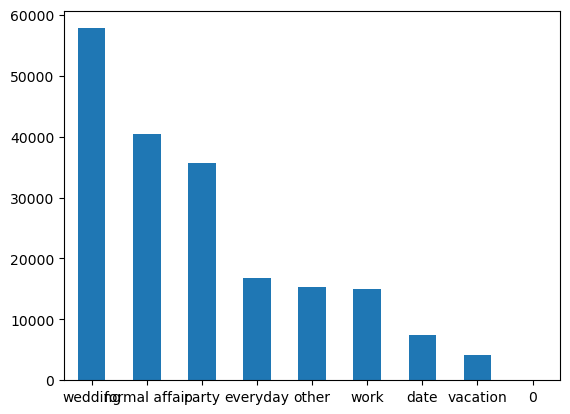

In [41]:
# 11. Checking distribution for column 'rented for'
df['rented for'].value_counts().plot.bar(rot=0)